In [1]:
import sqlite3

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

sales_data = [
    ('Pen', 10, 5),
    ('Pen', 15, 5),
    ('Notebook', 5, 50),
    ('Notebook', 10, 50),
    ('Pencil', 20, 2)
]

cursor.executemany(
    "INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)",
    sales_data
)

conn.commit()
print("Database created successfully")


Database created successfully


In [2]:
import pandas as pd

query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
df


,product,total_qty,revenue
0,Notebook,15,750.0
1,Pen,25,125.0
2,Pencil,20,40.0


In [3]:
print(df)


    product  total_qty  revenue
0  Notebook         15    750.0
1       Pen         25    125.0
2    Pencil         20     40.0


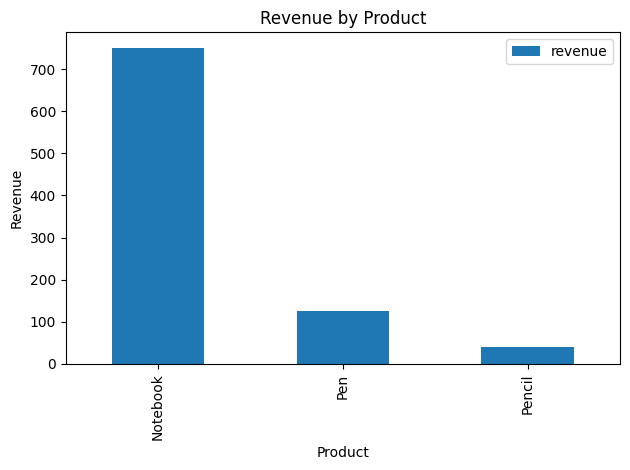

In [4]:
import matplotlib.pyplot as plt

df.plot(kind='bar', x='product', y='revenue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()
